# 3. 기상데이터 분석
* 평균 기온이 상승했을까?
* 가장 더웠던 날과 최고 기온은?
* 가장 추웠던 날과 최저 기온은?
* 일교차가 가장 큰 달은?
* 우리나라에서 가장 추운 지역은? 더운 지역은?
* 내가 사는 지역의 데이터 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
df = pd.read_csv('../data/busan_temperature.csv', encoding='euc-kr')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [4]:
df.shape

(42830, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42830 entries, 0 to 42829
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       42830 non-null  object 
 1   지점       42830 non-null  int64  
 2   평균기온(℃)  42830 non-null  float64
 3   최저기온(℃)  42821 non-null  float64
 4   최고기온(℃)  42827 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,42830.0,42830.000000,42821.000000,42827.000000
mean,159.0,14.137133,10.786749,18.407768
std,0.0,8.316390,8.845961,8.101579
min,159.0,-11.300000,-14.000000,-8.200000
25%,159.0,7.400000,3.600000,12.000000
50%,159.0,15.100000,11.600000,19.400000
75%,159.0,20.900000,18.100000,24.900000
max,159.0,31.700000,28.300000,37.300000


In [7]:
df.drop('지점', axis=1, inplace=True)
df.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,11.3,7.8,16.1
1,1904-04-10,9.3,4.7,15.2
2,1904-04-11,10.6,NaN,14.9
3,1904-04-12,11.3,8.8,13.4
4,1904-04-13,14.5,11.1,16.9


In [8]:
df.columns = ['날짜', '평균', '최저', '최고']
df.head()

,날짜,평균,최저,최고
0,1904-04-09,11.3,7.8,16.1
1,1904-04-10,9.3,4.7,15.2
2,1904-04-11,10.6,NaN,14.9
3,1904-04-12,11.3,8.8,13.4
4,1904-04-13,14.5,11.1,16.9


In [9]:
df.날짜 = pd.to_datetime(df.날짜)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42830 entries, 0 to 42829
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      42830 non-null  datetime64[ns]
 1   평균      42830 non-null  float64       
 2   최저      42821 non-null  float64       
 3   최고      42827 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


In [10]:
df.날짜.dt.year

0        1904
1        1904
2        1904
3        1904
4        1904
         ... 
42825    2021
42826    2021
42827    2021
42828    2021
42829    2021
Name: 날짜, Length: 42830, dtype: int64

In [11]:
df['년도'] = df.날짜.dt.year
df['월'] = df.날짜.dt.month
df['일'] = df.날짜.dt.day
df.head()

,날짜,평균,최저,최고,년도,월,일
0,1904-04-09,11.3,7.8,16.1,1904,4,9
1,1904-04-10,9.3,4.7,15.2,1904,4,10
2,1904-04-11,10.6,NaN,14.9,1904,4,11
3,1904-04-12,11.3,8.8,13.4,1904,4,12
4,1904-04-13,14.5,11.1,16.9,1904,4,13


In [12]:
# 평균 기온이 상승했을까?
# 8월 1일
df_8 = df.loc[(df.월 == 8) & (df.일 == 1), ['년도', '평균']]
df_8.head()

,년도,평균
114,1904,26.2
479,1905,25.4
844,1906,24.1
1209,1907,24.1
1575,1908,27.3


In [13]:
# 12월 1일
df_12 = df.loc[(df.월 == 12) & (df.일 == 1), ['년도', '평균']]
df_12.head()

,년도,평균
236,1904,5.7
601,1905,9.3
966,1906,7.0
1331,1907,2.4
1697,1908,2.3


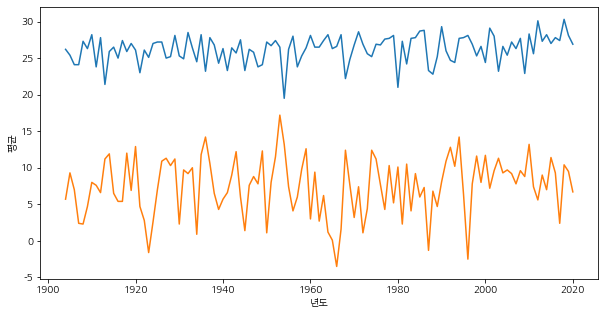

In [17]:
# 마이너스 깨짐 설정
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
sns.lineplot(x='년도', y='평균', data=df_8)
sns.lineplot(x='년도', y='평균', data=df_12)
plt.show()

In [40]:
# 가장 더웠던 날과 최고 기온은?
df.sort_values(by='최고', ascending=False).head(10)

,날짜,평균,최저,최고,년도,월,일
41035,2016-08-14,31.7,28.3,37.3,2016,8,14
28971,1983-08-04,30.8,26.5,36.7,1983,8,4
41036,2016-08-15,29.4,25.3,36.6,2016,8,15
41756,2018-08-05,31.3,28.1,36.4,2018,8,5
41392,2017-08-06,31.7,27.6,36.2,2017,8,6
28972,1983-08-05,30.1,27.1,36.1,1983,8,5
14753,1944-08-30,27.4,23.0,36.0,1944,8,30
14739,1944-08-16,29.1,25.6,35.9,1944,8,16
32978,1994-07-24,30.3,26.6,35.8,1994,7,24
16935,1950-08-21,29.8,25.4,35.7,1950,8,21


In [41]:
# 가장 추웠던 날과 최저 기온은?
df.sort_values(by='최저').head(10)

,날짜,평균,최저,최고,년도,월,일
3931,1915-01-13,-11.3,-14.0,-8.2,1915,1,13
38998,2011-01-16,-6.9,-12.8,-1.1,2011,1,16
4657,1917-01-08,-9.0,-12.7,-3.9,1917,1,8
3932,1915-01-14,-8.9,-12.7,-5.8,1915,1,14
26611,1977-02-16,-8.7,-12.6,-3.0,1977,2,16
6842,1923-01-02,-8.6,-12.5,-5.2,1923,1,2
11605,1936-01-17,-8.4,-12.4,-5.0,1936,1,17
21466,1963-01-16,-6.5,-12.4,0.0,1963,1,16
9773,1931-01-11,-8.1,-12.4,-3.7,1931,1,11
14157,1943-01-12,-8.1,-12.4,-2.8,1943,1,12


In [42]:
# 일교차가 가장 큰 달은?
df['일교차'] = df.최고 - df.최저
df.head()

,날짜,평균,최저,최고,년도,월,일,일교차
0,1904-04-09,11.3,7.8,16.1,1904,4,9,8.3
1,1904-04-10,9.3,4.7,15.2,1904,4,10,10.5
2,1904-04-11,10.6,NaN,14.9,1904,4,11,NaN
3,1904-04-12,11.3,8.8,13.4,1904,4,12,4.6
4,1904-04-13,14.5,11.1,16.9,1904,4,13,5.8


In [45]:
df.groupby('월')['일교차'].mean().to_frame().sort_values(by='일교차')

,일교차
월,
7,5.591319
8,6.208795
6,6.554972
9,6.920940
5,7.699891
4,8.079580
1,8.214089
12,8.302647
10,8.404411
